# Astr 257 Test Assignment, Aditya Sengupta

In [1]:
!which python

/Users/adityasengupta/opt/anaconda3/envs/astr257/bin/python


In [2]:
# %pip install numpy astropy photutils matplotlib;

In [3]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from photutils.centroids import centroid_sources, centroid_com

In [4]:
# step 1: open the file test.fits in Python
from astropy.io import fits
hdul = fits.open("test.fits")
hdul.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     269   (256, 256)   float32   


Text(0.5, 1.0, 'Test image')

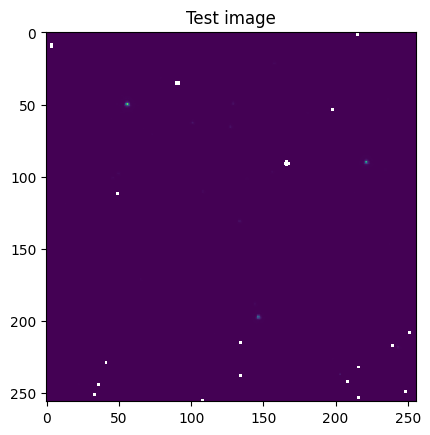

In [5]:
img = hdul[0].data
plt.imshow(img)
plt.title("Test image")

Text(0.5, 1.0, '40x40 px cutout around the brightest star')

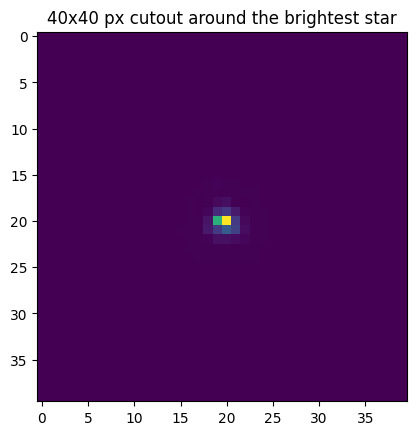

In [6]:
# step 2: crop a 40x40 pixel region around the brightest star in the image.
half_crop_size = 20
x, y = np.where(img == np.nanmax(img))
xp, yp = x[0], y[0] # if more than one point attains the maximum, arbitrarily pick the top left most
cropped_img = img[(xp - half_crop_size):(xp + half_crop_size), (yp - half_crop_size):(yp + half_crop_size)]
plt.imshow(cropped_img)
plt.title("40x40 px cutout around the brightest star")

In [7]:
# step 3: save the cropped region as test2.fits
hdu = fits.PrimaryHDU(cropped_img)
hdu.writeto('test2.fits')

OSError: File test2.fits already exists. If you mean to replace it then use the argument "overwrite=True".

In [ ]:
# step 4: use the code photutils to measure the centroid of this star in the uncropped region
[i[0] for i in centroid_sources(img, x, y)]

[55.78048699494043, 50.164588079285885]

Text(0.5, 1.0, 'Test image with a red + marker over the star centroid')

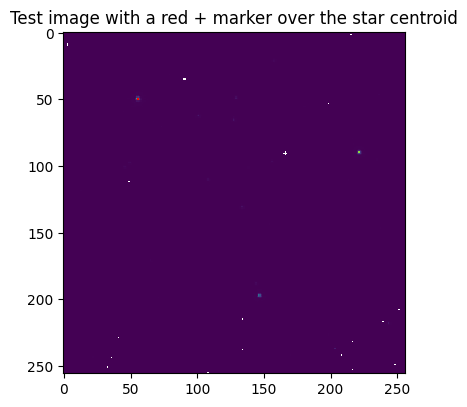

In [ ]:
x, y = centroid_sources(img, x, y, centroid_func=centroid_com)
plt.figure(figsize=(8, 4))
plt.imshow(img, interpolation='nearest')
plt.scatter(x, y, marker='+', s=2, color='red')
plt.tight_layout()
plt.title("Test image with a red + marker over the star centroid")